### Question 4

#### Part 1

In [147]:
from os import listdir
from os.path import join
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [148]:
# Code adapted from https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
path = "./yalefaces/"
images = listdir(path)
subject1_files = [
    join(path, f) for f in images if ("-test" not in f) and ("subject01" in f)
]
subject2_files = [
    join(path, f) for f in images if ("-test" not in f) and ("subject02" in f)
]

In [149]:
# Convert images to a matrix
def create_image_mat(files):

    matrix = []
    for image in files:
        with Image.open(image) as im:
            im = np.array(im)
            cropped_im = im[:240, :320]
            downsized_im = cropped_im[::4, ::4]
            matrix.append(downsized_im.flatten())

    matrix = np.array(matrix)
    return matrix

In [150]:
# Obtain subject01 and subject02 matrices

sub1_mat = create_image_mat(subject1_files)
sub2_mat = create_image_mat(subject2_files)

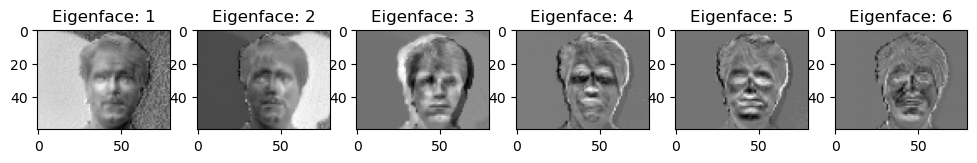

In [151]:
# Subject1 top 6 eigenfaces
np.random.seed(6740)

pca_01 = PCA(n_components=6)
pca_01.fit(sub1_mat)
eigenface_vects_01 = pca_01.components_

fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(12, 5))

for i in range(6):
    im = eigenface_vects_01[i, :].reshape((60, 80))
    axs[i].imshow(im, cmap="gray")
    axs[i].set_title("Eigenface: %s" % str(i + 1))

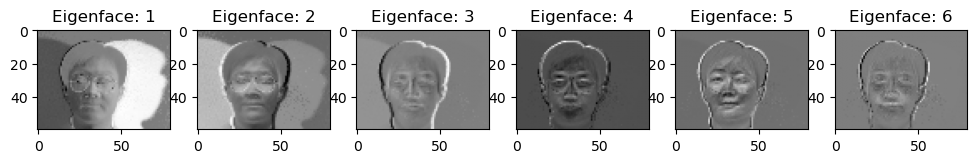

In [152]:
# Subject2 top 6 eigenfaces
np.random.seed(6740)

pca_02 = PCA(n_components=6)
pca_02.fit(sub2_mat)
eigenface_vects_02 = pca_02.components_

fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(12, 5))

for i in range(6):
    im = eigenface_vects_02[i, :].reshape((60, 80))
    axs[i].imshow(im, cmap="gray")
    axs[i].set_title("Eigenface: %s" % str(i + 1))

#### Part 2

In [153]:
sub1_test = join(path, "subject01-test.gif")
sub2_test = join(path, "subject02-test.gif")

with Image.open(sub1_test) as im:
    im = np.array(im)
    cropped_im = im[:240, :320]
    sub1_test_mat = cropped_im[::4, ::4].reshape(1, -1)

with Image.open(sub2_test) as im:
    im = np.array(im)
    cropped_im = im[:240, :320]
    sub2_test_mat = cropped_im[::4, ::4].reshape(1, -1)

sub1_test_mat.shape

(1, 4800)

In [154]:
np.random.seed(6740)

mu1 = pca_01.mean_
centered_sub1_test = sub1_test_mat - mu1
centered_sub1_test = centered_sub1_test.T

# Get the top eigenface for subject01
sub1_eigenface = eigenface_vects_01[0, :].reshape(-1, 1)


mu2 = pca_02.mean_
centered_sub2_test = sub2_test_mat - mu2
centered_sub2_test = centered_sub2_test.T

# Get the top eigenface for subject02
sub2_eigenface = eigenface_vects_02[0, :].reshape(-1, 1)

In [160]:
# Projection residual of subject01 eigenface vs subject01 test image
s11 = centered_sub1_test - sub1_eigenface @ sub1_eigenface.T @ centered_sub1_test
s11 = np.dot(s11.T, s11)

# Projection residual of subject01 eigenface vs subject02 test image
s12 = centered_sub2_test - sub1_eigenface @ sub1_eigenface.T @ centered_sub2_test
s12 = np.dot(s12.T, s12)

# Projection residual of subject02 eigenface vs subject01 test image
s21 = centered_sub1_test - sub2_eigenface @ sub2_eigenface.T @ centered_sub1_test
s21 = np.dot(s21.T, s21)

# Projection residual of subject02 eigenface vs subject02 test image
s22 = centered_sub2_test - sub2_eigenface @ sub2_eigenface.T @ centered_sub2_test
s22 = np.dot(s22.T, s22)

s11, s12, s21, s22

(array([[7100741.52196747]]),
 array([[4789550.33819623]]),
 array([[6182373.7198808]]),
 array([[4169232.92382878]]))

#### Part 3
Please see report for comments